<div >
<img src = "../../../banner.jpg" />
</div>

<style type="text/css">

.responsive {
 width: 100%;
 height: 25%;
}

.list-group-item.active, .list-group-item.active:focus, .list-group-item.active:hover {
    z-index: 2;
    color: #fff;
    background-color: #1B175E;
    border-color: #337ab7;
}
h1, h2, h3, h4 {
    color: #000002;
    background-color: #1B175E;
    background-image:
      linear-gradient(to right,
       #fff, #ffff00
     );

}

h1, h2, h3, h4, p {
    color: #000002;
}

a {
    color: #1B175E;
}
</style>

# Introduction

The concept behind resampling techniques for evaluating model performance is straightforward: a portion of the data is used to train the model, while the remaining data is used to assess the model's accuracy. 

This process is repeated several times with different subsets of the data, and the results are averaged and summarized. The primary differences between resampling techniques lie in the method by which the subsets of data are selected. 

In the following sections, we will discuss the main types of resampling techniques.




# Predicting Wages

Our objective today is to construct a model of individual wages

$$
w = f(X) + u 
$$

where w is the  wage, and X is a matrix that includes potential explanatory variables/predictors. In this problem set, we will focus on a linear model of the form

\begin{align}
 ln(w) & = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p  + u 
\end{align}

were $ln(w)$ is the logarithm of the wage.

To illustrate I'm going to use a sample of the NLSY97. The NLSY97 is  a nationally representative sample of 8,984 men and women born during the years 1980 through 1984 and living in the United States at the time of the initial survey in 1997.  Participants were ages 12 to 16 as of December 31, 1996.  Interviews were conducted annually from 1997 to 2011 and biennially since then.  

Let's load the packages and the data set:

In [28]:
#packages
require("pacman")
p_load("tidyverse","stargazer")

nlsy <- read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')


Rows: 1266 Columns: 994
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (994): lnw_2016, educ, black, hispanic, other, exp, afqt, mom_educ, dad_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


what are the predictors that I have available?

In [29]:
glimpse(nlsy) 

Rows: 1,266
Columns: 994
$ lnw_2016                   <dbl> 4.0768976, 3.2941382, 2.8308961, 4.3064590,…
$ educ                       <dbl> 16, 9, 9, 16, 16, 16, 17, 16, 17, 16, 16, 2…
$ black                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ hispanic                   <dbl> 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0…
$ other                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ exp                        <dbl> 11, 19, 22, 13, 15, 14, 14, 14, 13, 14, 13,…
$ afqt                       <dbl> 7.0724, 4.7481, 1.1987, 8.9321, 2.2618, 8.9…
$ mom_educ                   <dbl> 12, 9, 12, 16, 16, 18, 12, 12, 16, 18, 16, …
$ dad_educ                   <dbl> 12, 10, 9, 18, 16, 20, 16, 12, 9, 14, 16, 2…
$ yhea_100_1997              <dbl> 3, 2, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3…
$ yhea_2000_1997             <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 4, 5, 5…
$ yhea_2100_1997             <dbl> 0, 10, 7, 10, 10, 7, 10, 6, 10, 0, 8, 1, 9,…
$ yhea_2200_199

Let's keep a couple of these predictors and look at their statistics

In [30]:
nlsy<- nlsy  %>% select(lnw_2016, 
                        educ,
                        black,
                        hispanic,
                        other,
                        exp,
                        afqt,
                        mom_educ,
                        dad_educ)

The descriptive statistics?

In [32]:
stargazer(data.frame(nlsy), header=FALSE, type='text',title="Variables Included in the Selected Data Set")


Variables Included in the Selected Data Set
Statistic   N    Mean  St. Dev.  Min    Max  
---------------------------------------------
lnw_2016  1,266 3.110   0.869   -1.955 7.393 
educ      1,266 14.314  2.900     8      20  
black     1,266 0.182   0.386     0      1   
hispanic  1,266 0.117   0.321     0      1   
other     1,266 0.007   0.084     0      1   
exp       1,266 14.582  3.238     7      23  
afqt      1,266 5.325   2.915   0.000  10.000
mom_educ  1,266 13.303  2.401     4      20  
dad_educ  1,266 13.254  2.908     3      20  
---------------------------------------------


Let's plot the distribution of wages:

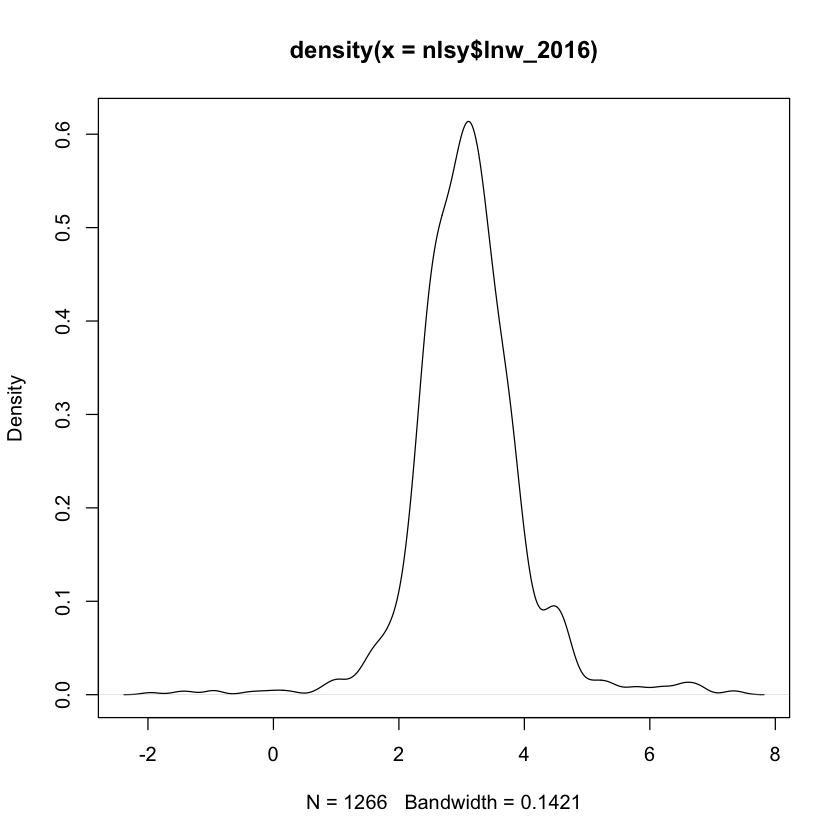

In [34]:
plot(density(nlsy$lnw_2016))

Armed Forces Qualification Test (AFQT) is comparable to other popular intelligence quotient (IQ) test in the fact that is tests an individual's base intelligence level.

In [35]:
nlsy <- nlsy  %>% mutate(afqt2=afqt^2)

In [36]:
reg_afqt<- lm(lnw_2016~afqt+afqt2,nlsy)

stargazer(reg_educ,type="text")


                        Dependent variable:    
                    ---------------------------
                             lnw_2016          
-----------------------------------------------
afqt                         0.094***          
                              (0.033)          
                                               
afqt2                         -0.002           
                              (0.003)          
                                               
Constant                     2.667***          
                              (0.075)          
                                               
-----------------------------------------------
Observations                   1,266           
R2                             0.068           
Adjusted R2                    0.067           
Residual Std. Error      0.840 (df = 1263)     
F Statistic          46.335*** (df = 2; 1263)  
Note:               *p<0.1; **p<0.05; ***p<0.01


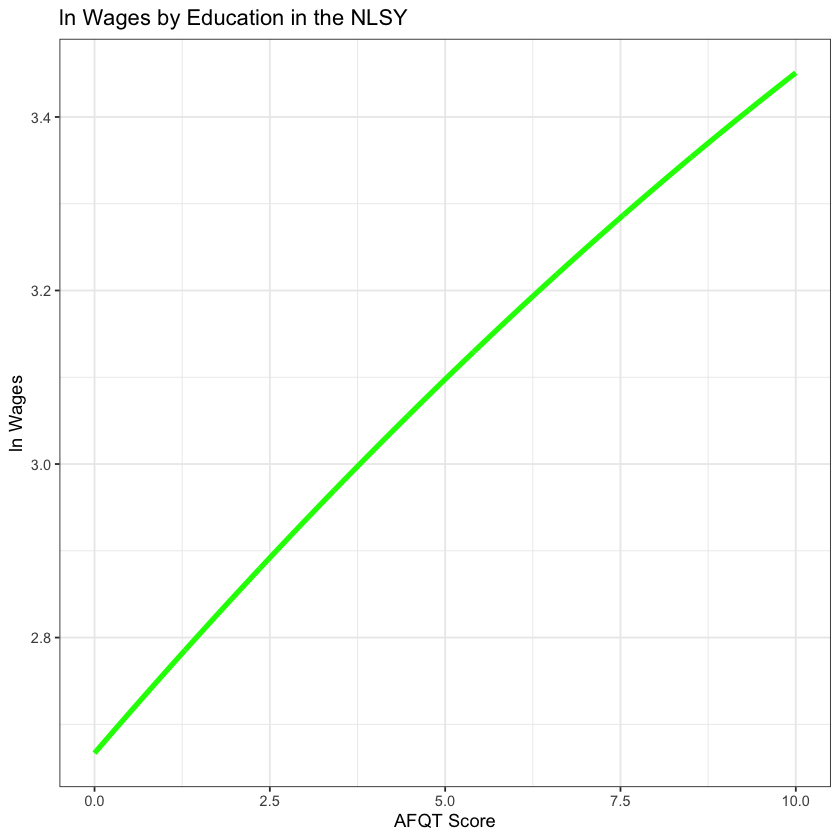

In [37]:
nlsy <- nlsy  %>% mutate(yhat=predict(reg_educ)) #con el paquete mutate

summ = nlsy %>%  
  group_by(
    afqt, afqt2
  ) %>%  
  summarize(
    mean_y = mean(lnw_2016),
    yhat_reg = mean(yhat), .groups="drop"
  ) 


ggplot(summ) + 
  geom_line(
    aes(x = afqt, y = yhat_reg), 
    color = "green", size = 1.5
  ) + 
  labs(
    title = "ln Wages by Education in the NLSY",
    x = "AFQT Score",
    y = "ln Wages"
  ) +
  theme_bw()

In [38]:
reg_afqt$coefficients

(Intercept)         afqt        afqt2 
 2.666823093  0.093945486 -0.001553715

In [39]:
-reg_afqt$coefficients[2]/(2*reg_afqt$coefficients[3])

afqt 
30.23253

# Validation Set  Approach

The first method to evaluate out-of-sample performance is the validation set approach. In this approach, a fixed portion of the data is designated as the validation set, and the model is trained on the remaining data. The model's performance is then evaluated on the validation set. These partitions are usually called:

   - Training sample: to build/estimate/train the model
   - Testing (validation, hold-out) sample:  to evaluate its performance 

Partitions can be of any size. Usually, 70%-30% or 80%-20% are used. Graphically, a 70%-30% partition looks like:     
    
<div>
<img src="30-70.png" width="500"/>
</div>

Let's implement this in `R`.

We begin by generating a sample index that will indicate with `TRUE` those observations randomly assigned to the training data set with 70% probability, and with `FALSE` those observations randomly assigned to the testing data set with 30% chance.

In [40]:
#Make this example reproducible
set.seed(123)

#use 70% of the dataset as a training set and 30% as a test set
sample <- sample(c(TRUE, FALSE), nrow(nlsy), replace=TRUE, prob=c(0.7,0.3))
head(sample)

[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE

we can check that the partition:

In [41]:
sum(sample)/nrow(nlsy)

[1] 0.706951

With the above index, we generate the partition:

In [42]:
train  <- nlsy[sample, ] #train sample those that are TRUE in the sample index
test   <- nlsy[!sample, ] #test sample those that are FALSE in the sample index
dim(train)

[1] 895  11

Another way of partitioning the data is to use `dplyr` package included in `tidyverse`. With this approach, we first create a column with the row number, take a sample of 70% of the sample and use this sample for training. The test set is the remaining, obtained by `anti_join()`. 

In [ ]:
#remove the comments to execute this portion of the code
#Make this example reproducible
#set.seed(123)

#create ID column with a row number
#nlsy$id <- 1:nrow(nlsy)

#use 70% of the dataset as a training set and 30% as a test set 
#train <- nlsy %>% dplyr::sample_frac(0.70)
#test  <- dplyr::anti_join(nlsy, train, by = 'id')



## Predicting wages

With these partitions in place, we can start building our predictive models. We begin by using a simple model with no covariates, just a constant:

In [43]:
model1<-lm(lnw_2016~1,data=train)
summary(model1)


Call:
lm(formula = lnw_2016 ~ 1, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0668 -0.4639 -0.0127  0.4138  4.2818 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.11143    0.02847   109.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8519 on 894 degrees of freedom


In this case, the prediction for the log wage is the average train sample average

$$
\hat{y}=\hat{\beta_1}=\frac{\sum y_i}{n}=m
$$

In [44]:
coef(model1)

(Intercept) 
   3.111427

In [45]:
paste("Coef:", mean(train$lnw_2016))

[1] "Coef: 3.11142668361229"

Since we are concerned with predicting well out-of -sample, we need to evaluate our model in the testing data. For that, we use the coefficient estimated in the training data and use it as a predictor in the testing data:

In [46]:
#prediction on new data
test$model1<-predict(model1,newdata = test)

Then we can calculate the out-of-sample performance using the MSE:

$$
test\,MSE=E((y-\hat{y})^2)
$$ 
in `R`:

In [47]:
with(test,mean((lnw_2016-model1)^2))

[1] 0.8276081

This is quite a naive model that uses the sample average as a prediction. 

Let's see if we can improve (reduce the prediction error) this model.

To improve our prediction, we can start adding explanatory variables. Let's begin by adding only one variable,  `education (educ)`:

In [48]:
model2<-lm(lnw_2016~educ,data=train)
test$model2<-predict(model2,newdata = test)

and evaluate the  out-of-sample performance

In [49]:
with(test,mean((lnw_2016-model2)^2))

[1] 0.7963705

There's a clear diminution in MSE. Let's add complexity by adding more variables:


In [50]:
model3<-lm(lnw_2016~educ + exp + afqt + mom_educ + dad_educ,data=train)
test$model3<-predict(model3,newdata = test)


The performance:

In [51]:
with(test,mean((lnw_2016-model3)^2))

[1] 0.7881659

In this case, the MSE keeps improving. Is there a limit to this improvement? Can we keep adding features and complexity? What about an extremely complex model that includes polynomials and interactions.

In [52]:
model4<-lm(lnw_2016~poly(educ,8,raw=TRUE):poly(exp,3,raw=TRUE):
           poly(afqt,3,raw=TRUE)+ poly(mom_educ,3,raw=TRUE):
           poly(dad_educ,3,raw=TRUE) +
           black+hispanic + other,data=train)

test$model4<-predict(model4,newdata = test)

The performance:

In [53]:
with(test,mean((lnw_2016-model4)^2))

[1] 0.9338882

In [61]:
yhat_train<-predict(model3,newdata=train)

In [62]:
mean((train$lnw_2016-yhat_train)^2)

[1] 0.6473259

Le'ts put all these performance resuls in a table and compare them


In [54]:
#create vars with all the MSE
mse1<-with(test,round(mean((lnw_2016-model1)^2),3))
mse2<-with(test,round(mean((lnw_2016-model2)^2),3))
mse3<-with(test,round(mean((lnw_2016-model3)^2),3))
mse4<-with(test,round(mean((lnw_2016-model4)^2),3))

#put them in a vector
mse<-c(mse1,mse2,mse3,mse4)

#create a data frame
db<-data.frame(model=factor(c("model1","model2","model3","model4"),ordered=TRUE),
               MSE=mse)

db

model,MSE
<ord>,<dbl>
model1,0.828
model2,0.796
model3,0.788
model4,0.934


It is clear that as complexity increases, performance improves until a point where too much complexity results in inferior performance. 

This is an illustration of the Bias-Variance-Trade-Off.

Although the validation set approach is quite nice, there are at least two problems with it
  
  1. The first one is that given an original data set if part of it is left aside to test the model, fewer data is left for estimation (leading to less efficiency).
  2. A second problem is deciding which data will be used to train the model and which one to test i

# Leave-One-Out Cross-Validation (LOOCV) 

This method is similar to the Validation Set Approach, but it tries to address the latter's disadvantages. Leave-One-Out Cross-Validation (LOOCV) is a resampling technique for evaluating model performance. Each sample in the data is used once as the validation set, and the model is trained on the remaining samples. 

Graphically the LOOCV looks like this: 


<div>
<img src="1.png" width="500"/>
</div>

<div>
<img src="2.png" width="500"/>
</div>


<div>
<img src="3.png" width="500"/>
</div>

.

.

.

.

.

.

.

.

<div>
<img src="20.png" width="500"/>
</div>


LOOCV is computationally expensive, as a separate model has to be fit `n` times, where `n` is the number of samples in the data. However, LOOCV is more thorough in its model evaluation, as each sample is used as the validation set exactly once, giving a more comprehensive assessment of the model's performance.

The LOOCV estimate for the test MSE is

\begin{align}
LOOCV(n) &= \frac{1}{n}\sum MSE_{-i} \\ 
      &= \frac{1}{n}\sum(y_i -\hat{y}_{-i})^2
\end{align}

where $-i$ indicates that the model to obtain the prediction was trained in all observations except $i$.

LOOCV is particularly useful in cases where the number of samples in the data is small, and the risk of overfitting is high. LOOCV is a special case of k-fold cross-validation, where k is equal to the number of samples in the data. Given that it's a particular case of k-fold cross-validation, we will implement this in `R` instead.


# K-Fold Cross-Validation

K-Fold Cross-Validation  is a widely used resampling technique for evaluating model performance. It involves dividing the data into k equally sized folds, where k is a user-defined constant. The model is then fit k times, with each fold used once as the validation set and the remaining k-1 folds used as the training set. This process results in k estimates of the model's performance, which can then be averaged to obtain an overall estimate. Graphically it looks like this:




<div>
<img src="fold.png" width="500"/>
</div>

K-Fold Cross-Validation is a trade-off between the computational efficiency of the validation set approach and the thoroughness of LOOCV. On the one hand, K-Fold Cross-Validatio is more computationally efficient than LOOCV, as the model is fit k times instead of n times, where n is the number of samples in the data. On the other hand, K-Fold Cross-Validation is less thorough than LOOCV, as each sample is used in the validation set k-1/k of the time, giving a less comprehensive assessment of the model's performance.However, K-Fold Cross-Validation is widely used in practice. It provides a good balance between computational efficiency and thoroughness while allowing the user to control the number of times the model fits.

K-Fold Cross-Validatio provides a more robust evaluation of the model's performance than the validation set approach.  In the validation set approach, a fixed portion of the data is used as the validation set, which can result in a suboptimal estimation of the model's performance if the validation set is not representative of the data. In contrast, K-Fold Cross-Validatio ensures that each sample is used in the validation set exactly once, providing a more comprehensive assessment of the model's performance.

To sum up, to implement K-Fold Cross-Validation, we need to:

- Split the data into K parts $(n=\sum_{j=1}^k n_j)$

- Fit the model leaving out one of the folds $\rightarrow$ $\hat{y}_{-k}$
  
- Cycle through all k folds
 
-  The CV(k) estimate for the test MSE is


\begin{align}
CV_{(k)} &= \frac{1}{k}\sum_{j=1}^k MSE_j \\
         &= \frac{1}{k}\sum_{j=1}^k (y_j^k-\hat{y}_{-k})^{2}
\end{align}


Let's implement it in `R`

### Splitting the data into K folds


In [ ]:
#Make this example reproducible
set.seed(123)

# Specify the number of folds for
# 5-fold cross-validation
K <- 5

#Split the data set into 5 folds
index <- split(1:nrow(nlsy), 1: K)

We used the `split` function to generate a list with indexes that will help split the dataset into 5 parts of roughly equal size. We can see the first six indexes of the observations randomly assigned to the first partition or fold


In [ ]:
head(index[[1]])

Given that the size is not divisible by 5 `R` sometimes us a *Warning*, we can verify the length of each partition:

In [ ]:
lapply(index,length)

All partitions have roughly the same size. The only partition with one extra observation is the first one.

Note that to obtain the length, we used the `lapply` function. The `lapply` function is an extremely powerful function  used to apply a function to each element of a list and return a list as a result. It stands for "list apply," and it is a commonly used function in R for working with lists and vectors. 

The basic syntax of the lapply function is: `lapply(X, FUN)`, where X is the list or vector that we want to apply the function FUN to, and FUN is the function we want to apply. FUN can be any R function, and it takes a single argument, which will be one of the elements of X. The `lapply` function returns a list, where each element of the list results from applying FUN to a corresponding element of X. In our example above, the list is the `index` element, and the function is `length`, and it returns a list with the lengths of each partition.

The `lapply` function is useful when we need to perform the same operation on multiple elements of a list or vector and return a list as a result. It is a convenient alternative to using a for loop, as it is easier to read and write, more efficient for large lists, and faster and easily parallelizable in many circumstances.

With the indices, we can then split the data set

In [ ]:
#aplicar a la lista de folds 1,2,3,4,5
splt <- lapply(1:K, function(ind) nlsy[index[[ind]], ])

Then the first partition of the matchadata set will be in the first element of the `splt` element:

In [ ]:
splt[[1]]

## Fitting the model leaving out one of the folds 


To fit the model, we will again leverage the power of `lapply`, but first we need the `rbindlist` available in the `data.table` package

In [ ]:
p_load(data.table)

m1 <- lapply(1:K, function(ii) lm(lnw_2016~educ, data = rbindlist(splt[-ii]))) 

In the previous step, we fitted the model `lnw_2016~educ` in every fold except the `ii` fold. We achieved this by creating a function that runs a linear regression on a data set constructed by binding all the elements in the `splt` list except the element indexed by `ii`.

Next, we fit the model in the fold that was left as a testing fold.

In [ ]:
p1 <- lapply(1:K, function(ii) data.frame(predict(m1[[ii]], newdata = rbindlist(splt[ii]))))

We can see then that it created a vector with predictions:

In [ ]:
p1[1]

Now we bind this vector to each fold so we have extra column in each fold with the prediction, named `yhat`, 

In [ ]:
for (i in 1:K) {
  colnames(p1[[i]])<-"yhat" #change the name
  splt[[i]] <- cbind(splt[[i]], p1[[i]])

}

In [ ]:
splt[[1]]


## Calculating the MSE


Finally, we need to calculate the  CV(k) estimate for the test MSE. We know that it takes the form:

\begin{align}
CV_{(k)} &= \frac{1}{k}\sum_{j=1}^k MSE_j \\
         &= \frac{1}{k}\sum_{j=1}^k (y_j^k-\hat{y}_{-k})^{2}
\end{align}

To implment this formula we first need to calculate the MSE for each fold using `lapply`:

In [ ]:
MSE2_k <- lapply(1:K, function(ii) mean((splt[[ii]]$lnw_2016 - splt[[ii]]$yhat)^2))
MSE2_k

And finally, calculate the mean:

In [ ]:
mean(unlist(MSE2_k))

Note that since `lapply` always return a list, to be able to average the results, we first unlisted the object and then calculated the `mean`.

Finally, we can compare the results to that obtained using only the validation set approach:

In [ ]:
db$MSE[db$model=="model2"]


# If we have enough data


In some cases, where there's enough data, researchers may use both K-Fold Cross-Validation and the validation set approach in combination to evaluate the performance of a machine learning model. This can be useful when a researcher wants to obtain a more robust evaluation of the model's performance while maintaining computational efficiency.

The following figure shows the strategy followed by Kleinberg et al. (2017) in their paper "Human decisions and machine predictions":



<div>
<img src="human_decisions.png" width="500"/>
</div>


This strategy prevents the machine learning algorithm from appearing to do well simply because it is being evaluated on data it has already seen. Moreover, they add an extra layer of protection to ensure that the results are not an artifact of unhelpful "human data mining," adding a "pure hold-out."

By combining K-Fold Cross-Validation and the validation set approach, researchers can obtain a more comprehensive evaluation of the model's performance while maintaining computational efficiency. The specific combination of K-Fold Cross-Validation and the validation set approach will depend on the researcher's goals and the particular constraints of the study. When choosing a resampling technique, it is essential to carefully consider the trade-offs between computational efficiency and thoroughness.


